**Задача:** посмотреть значения метрик Entropy, Gini при разбиении тестового набора данных

In [ ]:
# подключаем библиотеки
import numpy as np
import matplotlib.pyplot as plt
from math import log2

In [ ]:
# пишем свои функции

def calc_pk(data):
    # считает вероятности pk для данных в нашем массиве data
    my_dict = {}
    for item in data:
        if item not in my_dict:
            my_dict[item] = 1
        else:
            my_dict[item] += 1
    # print(my_dic)
    return [item/len(data) for item in my_dict.values()]


def calc_entropy(pk):
    # по вероятностям pk считаем метрику Entropy
    return sum([(-1)*p*log2(p) for p in pk])


def calc_gini(pk):
    # по вероятностям pk считаем метрику Gini
    return 1-sum([p**2 for p in pk])

In [ ]:
# зададим данные из слайда 16 как "o" - оранжевый, "b" - синий
data = ["o", "b", "b", "b", "b", "o", "o", "o", "o", "b", "b", "b", "b", "o", "o", "o", "o", "o", "o", "b"]

In [ ]:
# проверочный расчет для массива data
print(f"For data:{data} ")
print(f" pk values is: {calc_pk(data)}")
print(f" Entropy = {calc_entropy(calc_pk(data))}")
print(f" Gini = {calc_gini(calc_pk(data))}")

For data:['o', 'b', 'b', 'b', 'b', 'o', 'o', 'o', 'o', 'b', 'b', 'b', 'b', 'o', 'o', 'o', 'o', 'o', 'o', 'b'] 
 pk values is: [0.55, 0.45]
 Entropy = 0.9927744539878083
 Gini = 0.4949999999999999


Для каждого значения section мы осуществим разбиение data $D$ на 2 подмножества $L$ и $R$
и посчитаем метрики:

1) Мера хаоса, которую мы минимизируем:
$$ C(k,t) = \frac{|L|}{|D|} * H(L) + \frac{|R|}{|D|} * H(R)$$

2) Мера прироста информации, которую мы максимизируем: 
$$Q(D,k,t) = H(D) - C(k,t) =$$ $$ = H(D) - \frac{|L|}{|D|} * H(L) + \frac{|R|}{|D|} * H(R)$$

где $H(x)$ - вычисляется по метриками Entropy или Gini

In [ ]:
section = np.arange(len(data))
print(section)
C_k_t_entr = np.zeros(len(section))
C_k_t_gini = np.zeros(len(section))
Q_k_t_entr = np.zeros(len(section))
Q_k_t_gini = np.zeros(len(section))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
# для уменьшения повторного счета
# H(D) для entropy
H_D_entr = calc_entropy(calc_pk(data))
# H(D) для gini
H_D_gini = calc_gini(calc_pk(data))
for t in section:
    # разбиение L = data[:t+1] выбрано для удобства и соответвия слайду 16
    # можно и с L = data[:t] начинать, но тогда картинка разойдется со слайдом 16
    L = data[:t+1]
    R = data[t+1:]
    C_k_t_entr[t] = len(L)/len(data) * calc_entropy(calc_pk(L)) + len(R)/len(data) * calc_entropy(calc_pk(R))
    C_k_t_gini[t] = len(L)/len(data) * calc_gini(calc_pk(L)) + len(R)/len(data) * calc_gini(calc_pk(R))
    Q_k_t_entr[t] = H_D_entr - C_k_t_entr[t]
    Q_k_t_gini[t] = H_D_gini - C_k_t_gini[t]

    # print(f" ---- \nt = {t}, for Entropy C(k,{t}) = {C_k_t_entr[t]}, for Gini C(k,{t}) = {C_k_t_gini[t]}")
    # print(f" D: {data} = \n L: {L}, D: {R}")
    # print(f" |L| = {len(L)}, |R| = {len(R)}")

In [ ]:
print("\nМассивы полученных значений ")
print(f"C(k,t) для Entropy = {C_k_t_entr}")
print(f"C(k,t) для Gini = {C_k_t_gini}")
print(f"Q(D,k,t) для Entropy = {Q_k_t_entr}")
print(f"Q(D,k,t) для Gini = {Q_k_t_gini}")


Массивы полученных значений 
C(k,t) для Entropy = [0.94810084 0.99196845 0.96854952 0.92580283 0.8692039  0.93368892
 0.96963364 0.98792125 0.99270084 0.9854753  0.95994974 0.9124325
 0.83188927 0.88466642 0.92807575 0.96225562 0.98562154 0.99196845
 0.93284375 0.99277445]
C(k,t) для Gini = [0.47368421 0.49444444 0.47843137 0.45       0.41333333 0.4547619
 0.47912088 0.49166667 0.49494949 0.49       0.47272727 0.44166667
 0.39340659 0.42619048 0.45333333 0.475      0.49019608 0.49444444
 0.46315789 0.495     ]
Q(D,k,t) для Entropy = [4.46736143e-02 8.06000133e-04 2.42249340e-02 6.69716268e-02
 1.23570555e-01 5.90855327e-02 2.31408133e-02 4.85320000e-03
 7.36107483e-05 7.29915676e-03 3.28247124e-02 8.03419502e-02
 1.60885188e-01 1.08108032e-01 6.46987063e-02 3.05188291e-02
 7.15291447e-03 8.06000133e-04 5.99307065e-02 0.00000000e+00]
Q(D,k,t) для Gini = [2.13157895e-02 5.55555556e-04 1.65686275e-02 4.50000000e-02
 8.16666667e-02 4.02380952e-02 1.58791209e-02 3.33333333e-03
 5.05050505e

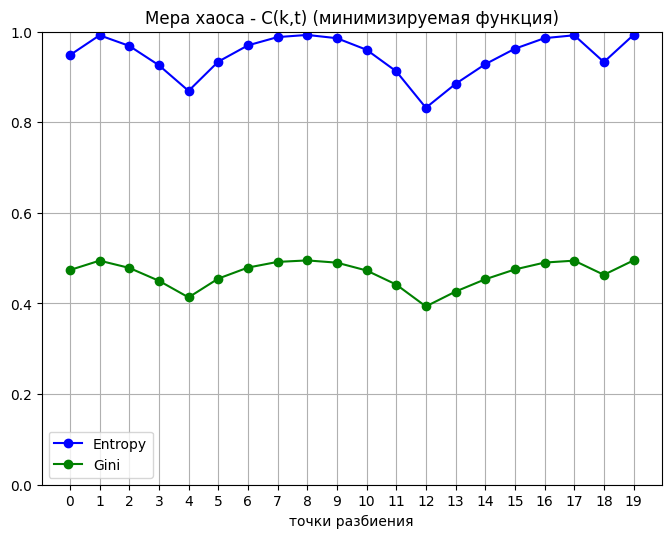

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(section, C_k_t_entr, marker='o', c="b", label="Entropy")
plt.plot(section, C_k_t_gini, marker='o', c="g", label="Gini")
plt.legend()
plt.xlabel("точки разбиения")
plt.xticks(section, section)
plt.title("Мера хаоса - C(k,t) (минимизируемая функция)")
plt.grid()
plt.ylim([0, 1])
plt.show()

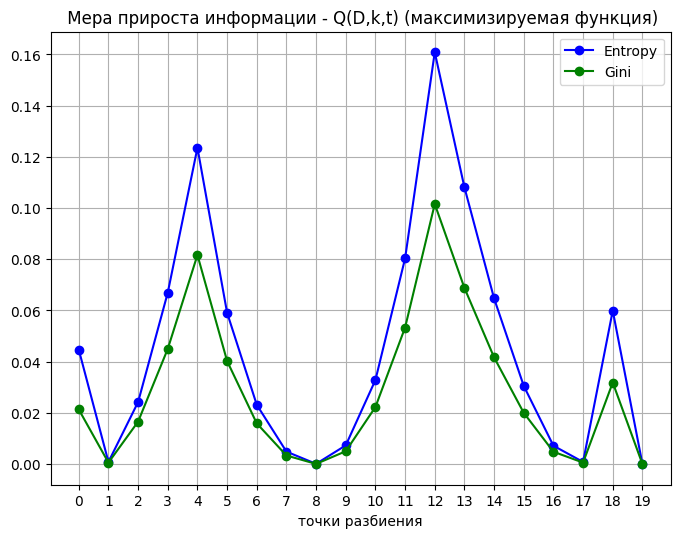

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(section, Q_k_t_entr, marker='o', c="b", label="Entropy")
plt.plot(section, Q_k_t_gini, marker='o', c="g", label="Gini")
plt.legend()
plt.xlabel("точки разбиения")
plt.xticks(section, section)
plt.title(" Мера прироста информации - Q(D,k,t) (максимизируемая функция)")
plt.grid()
# plt.ylim([0, 1])
plt.show()